<a href="https://colab.research.google.com/github/Rajasri8102/Rajasri-FITA-Capstone-Project-1/blob/main/FITA_Capstone_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Capstone Project 3 (Customer Segmentation + RFM Analysis)
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project3 Transaction RFM Dataset.csv"
df = pd.read_csv(csv_file_path)
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_id    41 non-null     int64  
 1   customer      41 non-null     object 
 2   amount        39 non-null     float64
 3   invoice_date  41 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


,invoice_id,amount
count,41.000000,39.000000
mean,20.829268,4730.769231
std,11.734356,1702.344180
min,1.000000,1500.000000
25%,11.000000,3500.000000
50%,21.000000,4500.000000
75%,31.000000,6050.000000
max,40.000000,8000.000000


In [ ]:
#📘 2. Data Cleaning
print("📘 2. Data Cleaning")
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
print(df["invoice_date"])
df["customer"] = df["customer"].str.strip().str.upper()
print(df["customer"])
print(df.isnull().sum())
print(df.duplicated().sum())
df["amount"] = df["amount"].fillna(df["amount"].median())
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
print(df.duplicated().sum())

📘 2. Data Cleaning
0    2023-01-01
1    2023-01-03
2    2023-01-04
3    2023-01-05
4    2023-01-06
5    2023-01-07
6    2023-01-08
7    2023-01-09
8    2023-01-10
9    2023-01-11
10   2023-01-12
11   2023-01-13
12   2023-01-14
13   2023-01-15
14   2023-01-16
15   2023-01-17
16   2023-01-18
17   2023-01-19
18   2023-01-20
19   2023-01-21
20   2023-01-22
21   2023-01-23
22   2023-01-24
23   2023-01-25
24   2023-01-26
25   2023-01-27
26   2023-01-28
27   2023-01-29
28   2023-01-30
29   2023-01-31
30   2023-02-01
31   2023-02-02
32   2023-02-03
33   2023-02-04
34   2023-02-04
35   2023-02-05
36   2023-02-06
37   2023-02-07
38   2023-02-08
39   2023-02-09
40   2023-02-10
Name: invoice_date, dtype: datetime64[ns]
0        MANO
1       KUMAR
2        AJAY
3       KUMAR
4        MANO
5        RAVI
6       DIVYA
7       MEENA
8      SURESH
9       ANITA
10    PRAKASH
11       AJAY
12     GEETHA
13    KARTHIK
14      RADHA
15    SANTOSH
16      NISHA
17      VARUN
18    PREETHI
19     ARVIND
20 

In [ ]:
#📘 2. Aggregate Data Per Customer
#✔ Total Spend
total_spend_per_customer = df.groupby("customer")["amount"].sum().sort_values(ascending=False)
print(total_spend_per_customer)
#✔ Frequency (number of purchases)
frequent_customer = df.groupby("customer")["invoice_id"].count().sort_values(ascending=False)
print(frequent_customer)
#✔ Average Spend
average_spend_per_customer = df.groupby("customer")["amount"].mean().sort_values(ascending=False)
print(average_spend_per_customer)


customer
MANO       40700.0
AJAY       24400.0
RAVI       17400.0
MEENA      16900.0
KUMAR      16700.0
RADHA       8000.0
ARVIND      6900.0
PRAKASH     6200.0
LAKSHMI     5800.0
RAMESH      5600.0
SANTOSH     5400.0
ANITA       5300.0
DEEPAK      4500.0
VARUN       4200.0
GEETHA      3900.0
SWATHI      3700.0
NISHA       3600.0
DIVYA       3200.0
PREETHI     3100.0
SURESH      2800.0
KARTHIK     2500.0
Name: amount, dtype: float64
customer
KUMAR      6
MANO       6
AJAY       5
MEENA      4
RAVI       3
DIVYA      1
DEEPAK     1
ARVIND     1
ANITA      1
LAKSHMI    1
KARTHIK    1
NISHA      1
GEETHA     1
PRAKASH    1
PREETHI    1
RADHA      1
RAMESH     1
SANTOSH    1
SURESH     1
SWATHI     1
VARUN      1
Name: invoice_id, dtype: int64
customer
RADHA      8000.000000
ARVIND     6900.000000
MANO       6783.333333
PRAKASH    6200.000000
LAKSHMI    5800.000000
RAVI       5800.000000
RAMESH     5600.000000
SANTOSH    5400.000000
ANITA      5300.000000
AJAY       4880.000000
DEEPAK     

In [ ]:
#✔ Recency (days since last purchase)
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
current = df["invoice_date"].max()
print(current)
df["recency"] = (current - df["invoice_date"]).dt.days
print(df["recency"])

2023-02-10 00:00:00
0     40
1     38
2     37
3     36
4     35
5     34
6     33
7     32
8     31
9     30
10    29
11    28
12    27
13    26
14    25
15    24
16    23
17    22
18    21
19    20
20    19
21    18
22    17
23    16
24    15
25    14
26    13
27    12
28    11
29    10
30     9
31     8
32     7
33     6
35     5
36     4
37     3
38     2
39     1
40     0
Name: recency, dtype: int64


In [ ]:
#📘 3. Build RFM Table
rfm = df.groupby("customer").agg({
    "invoice_date": lambda x: (current - x.max()).days,
    "invoice_id": "count",
    "amount": "sum"
})
rfm.columns = ["Recency", "Frequency", "Monetary"]
print(rfm)

          Recency  Frequency  Monetary
customer                              
AJAY            3          5   24400.0
ANITA          30          1    5300.0
ARVIND         20          1    6900.0
DEEPAK         18          1    4500.0
DIVYA          33          1    3200.0
GEETHA         27          1    3900.0
KARTHIK        26          1    2500.0
KUMAR           1          6   16700.0
LAKSHMI        19          1    5800.0
MANO            0          6   40700.0
MEENA           2          4   16900.0
NISHA          23          1    3600.0
PRAKASH        29          1    6200.0
PREETHI        21          1    3100.0
RADHA          25          1    8000.0
RAMESH          9          1    5600.0
RAVI            4          3   17400.0
SANTOSH        24          1    5400.0
SURESH         31          1    2800.0
SWATHI         17          1    3700.0
VARUN          22          1    4200.0


In [ ]:
#📘 4. Segment Customers
rfm["Segment"] = pd.cut(rfm["Monetary"],
                        bins=[0,5000,10000,50000],
                        labels=["Low-Value","Mid-Value","High-Value"])
print(rfm["Segment"])
print(rfm)

customer
AJAY       High-Value
ANITA       Mid-Value
ARVIND      Mid-Value
DEEPAK      Low-Value
DIVYA       Low-Value
GEETHA      Low-Value
KARTHIK     Low-Value
KUMAR      High-Value
LAKSHMI     Mid-Value
MANO       High-Value
MEENA      High-Value
NISHA       Low-Value
PRAKASH     Mid-Value
PREETHI     Low-Value
RADHA       Mid-Value
RAMESH      Mid-Value
RAVI       High-Value
SANTOSH     Mid-Value
SURESH      Low-Value
SWATHI      Low-Value
VARUN       Low-Value
Name: Segment, dtype: category
Categories (3, object): ['Low-Value' < 'Mid-Value' < 'High-Value']
          Recency  Frequency  Monetary     Segment
customer                                          
AJAY            3          5   24400.0  High-Value
ANITA          30          1    5300.0   Mid-Value
ARVIND         20          1    6900.0   Mid-Value
DEEPAK         18          1    4500.0   Low-Value
DIVYA          33          1    3200.0   Low-Value
GEETHA         27          1    3900.0   Low-Value
KARTHIK        26      

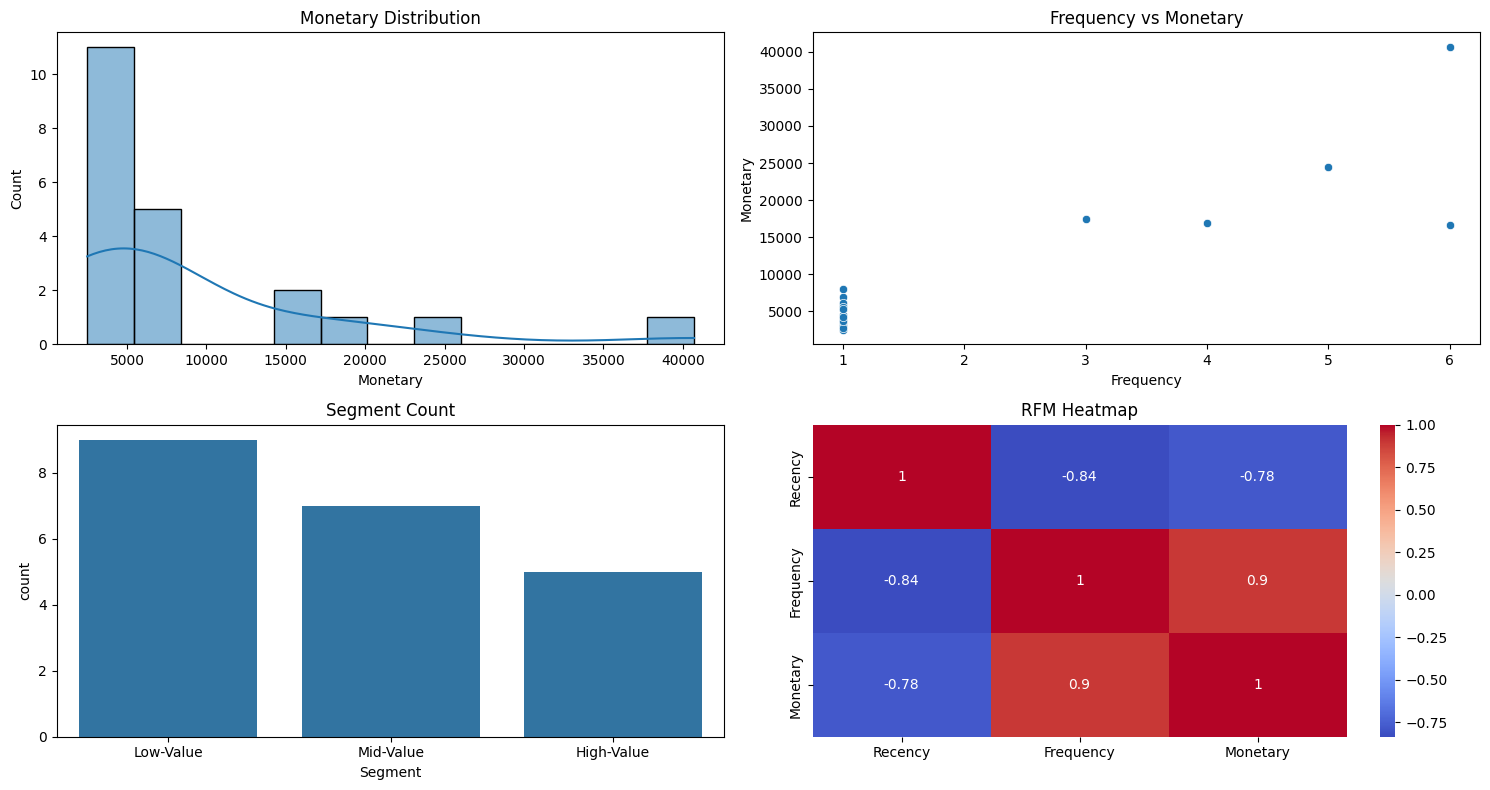

In [ ]:
#📘 5. Visualizations
#✔ Monetary distribution — Histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()
sns.histplot(data=rfm, x="Monetary", kde=True, ax=axes[0])
axes[0].set_title("Monetary Distribution")
#✔ Frequency vs Monetary — Scatter
sns.scatterplot(data=rfm, x="Frequency", y="Monetary", ax=axes[1])
axes[1].set_title("Frequency vs Monetary")
#✔ Segment count — Bar chart
sns.countplot(data=rfm, x="Segment", ax=axes[2])
axes[2].set_title("Segment Count")
#✔ RFM heatmap
corr = rfm[["Recency","Frequency","Monetary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("RFM Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
#📘 6. Insights
Mano is the highest value customer.
Kumar and Ajay are identified as frequent customers.
Customers spending between ₹5,000 and ₹10,000 fall into the high‑value segment.
Frequent customers generally show higher monetary value.
The Low‑value customer segment has the largest count.
The high monetary value segment is closer to the median in distribution.
Frequency and monetary value are strongly correlated, indicating that repeat purchases drive higher spending.
